In [271]:
import pandas as pd
import seaborn as sns
import numpy as np
from shapely import wkt
import geopandas as gpd


/home/leibnitz.rojas/.local/lib/python3.6/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [362]:
!ls -l

total 730172
drwxrwxr-x 2 leibnitz.rojas hadoopgroup      4096 jul 29 23:07 cache
drwxrwxr-x 3 leibnitz.rojas hadoopgroup      4096 ago 18 22:38 data
-rw-rw-r-- 1 leibnitz.rojas hadoopgroup      4604 ago 21 23:04 EdgesWaze.py
-rw-rw-r-- 1 leibnitz.rojas hadoopgroup  19237054 ago 18 17:36 LimaEdgesWaze0800_Final.txt
-rw-rw-r-- 1 leibnitz.rojas hadoopgroup   4395982 ago 16 05:00 LimaEdgesWaze0800_Recupero01.txt
-rw-rw-r-- 1 leibnitz.rojas hadoopgroup   1065617 ago 17 00:21 LimaEdgesWaze0800_Recupero02.txt
-rw-rw-r-- 1 leibnitz.rojas hadoopgroup    178551 ago 17 22:44 LimaEdgesWaze0800_Recupero03.txt
-rw-rw-r-- 1 leibnitz.rojas hadoopgroup     33231 ago 18 12:16 LimaEdgesWaze0800_Recupero04.txt
-rw-rw-r-- 1 leibnitz.rojas hadoopgroup  18183601 ago 14 22:20 LimaEdgesWaze0800.txt
-rw-rw-r-- 1 leibnitz.rojas hadoopgroup  16479259 ago 20 20:57 LimaEdgesWaze1400-Copy1.txt
-rw-rw-r-- 1 leibnitz.rojas hadoopgroup  19230896 ago 21 23:03 LimaEdgesWaze1400_Final.txt
-rw-rw-r-- 1 leibnitz.rojas hado

In [270]:
%%time
edges = pd.read_csv("data/GrafoLima_edges.csv", index_col=[0,1,2])
edges['geometry'] = edges['geometry'].apply(wkt.loads)
edges = gpd.GeoDataFrame(edges, crs='epsg:4326')
# edges.head()


NameError: name 'gpd' is not defined

In [275]:
edges.head(2)

osmid  oneway lanes  \
u         v           key                                                     
258066779 10985400003 0                              39457621    True     1   
          258066780   0    [1046533254, 338193454, 143630423]    True     2   

                                 highway maxspeed   length  \
u         v           key                                    
258066779 10985400003 0    motorway_link       80  109.492   
          258066780   0         motorway      100  782.922   

                                                                    geometry  \
u         v           key                                                      
258066779 10985400003 0    LINESTRING (-76.78468 -12.37136, -76.78466 -12...   
          258066780   0    LINESTRING (-76.78468 -12.37136, -76.78433 -12...   

                             ref                        name bridge junction  \
u         v           key                                                      
258066779 10985400003 0      NaN                         NaN    NaN      NaN   
          258066780   0    PE-1S  Carretera Panamericana Sur    yes      NaN   

                          access tunnel  width service  
u         v           key                               
258066779 10985400003 0      NaN    NaN    NaN     NaN  
          258066780   0      NaN    NaN    NaN     NaN

In [276]:
edges.shape

(395620, 15)

In [291]:
# edges.reset_index().drop_duplicates(subset=['u', 'v', 'wazeinfo']).shape

In [363]:
results = pd.read_csv('LimaEdgesWaze1400_Recupero04.txt', sep=';', index_col=0,names=['u','v','wazeinfo'])
print(results.shape)
a1 = results.shape[0]
a2 = results[results['wazeinfo'] == '(-1, -1)'].shape[0]
a2/a1

(562, 3)


0.6672597864768683

In [364]:
results[results['wazeinfo'] == '(-1, -1)'].shape

(375, 3)

In [294]:
# results.sort_index().drop_duplicates().head(50)

In [365]:
df1 = pd.read_csv('LimaEdgesWaze1400_Final.txt', sep=';', index_col=0,names=['u','v','wazeinfo'])
print(df1.shape)
df2 = pd.read_csv('LimaEdgesWaze1400_Recupero04.txt', sep=';', index_col=0,names=['u','v','wazeinfo'])
print(df2.shape)

(395620, 3)
(562, 3)


In [366]:
import numpy as np
df3 = df1.merge(df2['wazeinfo'], how='left', left_index=True, right_index=True)
df3['wazeinfo'] = df3.apply(lambda x: x['wazeinfo_x'] if x['wazeinfo_y'] is np.nan else x['wazeinfo_y'], axis=1)
df3.head()

,u,v,wazeinfo_x,wazeinfo_y,wazeinfo
0,258066779,10985400003,"(0.05, 0.107)",NaN,"(0.05, 0.107)"
150000,885687037,885687032,"(0.0, 0.0)",NaN,"(0.0, 0.0)"
50000,3269219429,1826749957,"(0.016666666666666666, 0.002)",NaN,"(0.016666666666666666, 0.002)"
1,258066779,258066780,"(0.45, 0.781)",NaN,"(0.45, 0.781)"
100000,4204959014,4204959013,"(0.2, 0.087)",NaN,"(0.2, 0.087)"


In [367]:
df3.drop(['wazeinfo_x', 'wazeinfo_y'], inplace=True, axis=1)

In [368]:
df3.shape

(395620, 3)

In [369]:
a1 = df3.shape[0]
a2 = df3[df3['wazeinfo'] == '(-1, -1)'].shape[0]
a1, a2, a2/a1

(395620, 375, 0.0009478792780951419)

In [370]:
df3.to_csv('LimaEdgesWaze1400_Final.txt', sep=';', header=False)

In [259]:
# pd.read_csv('LimaEdgesWaze0800_Final.txt', sep=';', index_col=0, names=['u','v','wazeinfo'])


In [257]:
df3.head()

,u,v,wazeinfo
0,258066779,10985400003,"(0.05, 0.107)"
1,258066779,258066780,"(0.45, 0.781)"
80000,7002794918,5009805463,"(0.43333333333333335, 0.123)"
120000,429567564,429567573,"(0.23333333333333334, 0.052)"
2,258066780,258066781,"(0.03333333333333333, 0.063)"


<AxesSubplot:xlabel='wazeinfo_km', ylabel='Count'>

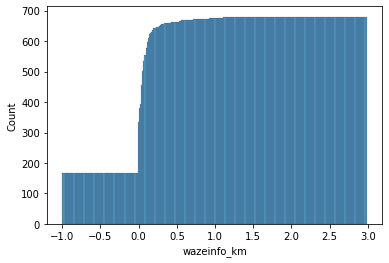

In [186]:
results['wazeinfo_minutes'] = results.apply(lambda x: x['wazeinfo'].replace('(','').replace(')','').split(',')[0], axis=1)
results['wazeinfo_km'] = results.apply(lambda x: x['wazeinfo'].replace('(','').replace(')','').split(',')[1], axis=1)
results[['wazeinfo_minutes', 'wazeinfo_km']] = results[['wazeinfo_minutes', 'wazeinfo_km']].astype(float)
# results

sns.histplot(results, x='wazeinfo_km', stat='count', cumulative=True)

In [188]:
# results[results['wazeinfo_km']<0].shape

<AxesSubplot:xlabel='wazeinfo_km', ylabel='Count'>

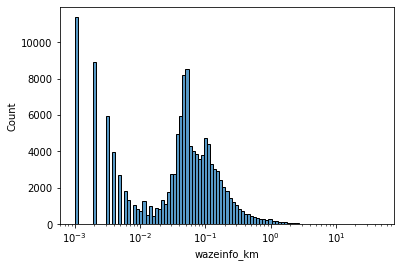

In [147]:
sns.histplot(results[results['wazeinfo_km']>0], x='wazeinfo_km', stat='count', log_scale=True)